<a href="https://www.kaggle.com/code/selimkoc/notebook2f4620f073?scriptVersionId=208642545" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [132]:
import numpy as np 
import pandas as pd 
import random
import seaborn as sns
import matplotlib.pyplot as plt
import geocoder

In [133]:
pd.set_option('display.max_columns', None)
data=pd.read_csv('/kaggle/input/airbnbopendata/Airbnb_Open_Data.csv')

/tmp/ipykernel_30/2555144767.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('/kaggle/input/airbnbopendata/Airbnb_Open_Data.csv')


In [134]:
data.shape

(102599, 26)

In [135]:
data_part = data.iloc[:data.shape[0] // 3, :]
"""
The shape function returns the number of rows and columns in the DataFrame.
`data.shape[0]` retrieves the total number of rows.
The `//` operator performs integer division to divide the rows into three parts.
"""

'\nThe shape function returns the number of rows and columns in the DataFrame.\n`data.shape[0]` retrieves the total number of rows.\nThe `//` operator performs integer division to divide the rows into three parts.\n'

In [136]:
data_part.shape

(34199, 26)

In [137]:
def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.

    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    Returns:
        df_missing (pd.DataFrame): Processed DataFrame object.

    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan

    return df_missing

In [138]:
data_miss = add_random_missing_values(data_part,0.02)

In [139]:
# Count missing values per column
missing_values = data_miss.isnull().sum()

# Print columns with missing values
print(missing_values[missing_values > 0])

# Calculate the percentage of missing values per column
missing_percentage = (missing_values / len(data_part)) * 100
print(missing_percentage[missing_percentage > 0])


id                                  664
NAME                                754
host id                             645
host_identity_verified              862
host name                           874
neighbourhood group                 704
neighbourhood                       694
lat                                 662
long                                675
country                             755
country code                        760
instant_bookable                    777
cancellation_policy                 734
room type                           726
Construction year                   807
price                               823
service fee                         771
minimum nights                      877
number of reviews                   716
last review                        6130
reviews per month                  6097
review rate number                  781
calculated host listings count      756
availability 365                    834
house_rules                       11758


In [140]:
def summarize_dataset(data, num_head=5, num_tail=5, drop_columns=None, drop_duplicates=False):
    """
    Summarizes a DataFrame with additional type analysis and parameter validation.

    Parameters:
    data (DataFrame): The DataFrame to summarize.
    num_head (int): Specifies how many rows to display from the beginning.
    num_tail (int): Specifies how many rows to display from the end.
    drop_columns (list): List of columns to drop.
    drop_duplicates (bool): Used to remove duplicates from the DataFrame.

    Returns:
    DataFrame: The processed DataFrame.
    """
    # Parameter validation
    if not isinstance(data, pd.DataFrame):
        raise ValueError("The `data` parameter must be a pandas DataFrame.")
    if not isinstance(num_head, int) or num_head < 0:
        raise ValueError("The `num_head` parameter must be a non-negative integer.")
    if not isinstance(num_tail, int) or num_tail < 0:
        raise ValueError("The `num_tail` parameter must be a non-negative integer.")
    if drop_columns and not isinstance(drop_columns, list):
        raise ValueError("The `drop_columns` parameter must be a list of column names.")
    
    # Display the first few rows
    print(f"First {num_head} rows:")
    print(data.head(num_head))
    print("\n")
    
    # Display the last few rows
    print(f"Last {num_tail} rows:")
    print(data.tail(num_tail))
    print("\n")
    
    # Display column names and data types
    print("Columns and Data Types:")
    print(data.dtypes)
    print("\n")
    
    # Analyze categorical and numerical columns
    categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
    numeric_cols = data.select_dtypes(include=['number']).columns.tolist()
    print(f"Categorical Columns: {categorical_cols}")
    print(f"Numeric Columns: {numeric_cols}")
    print("\n")
    
    # Check for missing values
    missing_values = data.isnull().sum()
    missing_columns = missing_values[missing_values > 0]
    print(f"Missing Values:\n{missing_columns}")
    print("\n")
    
    # Display statistical summary for numerical columns
    print("Statistical Summary:")
    print(data[numeric_cols].describe())
    print("\n")
    
    # Display the shape of the dataset
    print("Data Shape:")
    print(data.shape)
    print("\n")
    
    # Check for duplicate rows
    num_duplicates = data.duplicated().sum()
    print(f"Number of duplicated rows: {num_duplicates}")
    print("\n")

    # Drop duplicate rows if requested
    if drop_duplicates:
        initial_rows = data.shape[0]
        if drop_columns:
            data.drop_duplicates(subset=drop_columns, inplace=True)
        else:
            data.drop_duplicates(inplace=True)
        dropped_rows = initial_rows - data.shape[0]
        print(f"Number of dropped rows: {dropped_rows}")
    
    return data


In [141]:
summarize_dataset(data_miss)

First 5 rows:
          id                                              NAME       host id  \
0  1001254.0                Clean & quiet apt home by the park  8.001449e+10   
1  1002102.0                             Skylit Midtown Castle  5.233517e+10   
2  1002403.0               THE VILLAGE OF HARLEM....NEW YORK !  7.882924e+10   
3  1002755.0                                               NaN  8.509833e+10   
4  1003689.0  Entire Apt: Spacious Studio/Loft by central park  9.203760e+10   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country country code instant_bookable  \
0 

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254.0,Clean & quiet apt home by the park,8.001449e+10,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,NaN,NaN
1,1002102.0,Skylit Midtown Castle,5.233517e+10,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403.0,THE VILLAGE OF HARLEM....NEW YORK !,7.882924e+10,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755.0,NaN,8.509833e+10,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689.0,Entire Apt: Spacious Studio/Loft by central park,9.203760e+10,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,NaN,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34194,19886682.0,ENTIRE APARTMENT: BRIGHT & CHARMING- best loca...,6.199416e+10,verified,Paloma,Manhattan,East Village,40.72338,-73.98346,United States,US,False,flexible,Entire home/apt,2014.0,$938,$188,2.0,14.0,7/7/2019,1.39,5.0,2.0,5.0,"WHEN BOOKING, PLEASE PROVIDE THE FOLLOWING IN ...",NaN
34195,19887235.0,Luxury basement apartment in newly built house,8.686235e+10,verified,Ester,Queens,Fresh Meadows,40.73920,-73.79181,United States,US,True,flexible,Entire home/apt,2022.0,$407,$81,1.0,1.0,8/17/2018,0.09,2.0,1.0,363.0,No parties. No loud music or noise late at nig...,NaN
34196,19887787.0,Suite 18 - Cozy room w/ Private Bathroom,6.136332e+10,verified,Daisy,Brooklyn,Brighton Beach,40.57987,-73.95889,United States,US,False,moderate,Private room,2005.0,$463,$93,1.0,43.0,5/27/2019,3.82,2.0,5.0,283.0,No Smoking. No pets except by special arrange...,NaN
34197,19888339.0,Room available in spacious apartment UWS,4.099341e+10,unconfirmed,Claudia,Manhattan,Upper West Side,40.78493,-73.97683,United States,US,False,moderate,Private room,2011.0,$271,$54,4.0,4.0,1/2/2019,0.42,2.0,1.0,0.0,"No pet, No smoking - Quite hours : 9pm - 8am",NaN


# Data Cleaning

In [142]:
df_temp = data_miss.copy()

In [143]:
# Rename columns to standardize them, avoiding potential issues with case sensitivity and spaces in column names
df_temp.columns = [col.lower().replace(" ","_") for col in df_temp.columns]

In [144]:
df_temp.columns

Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'house_rules', 'license'],
      dtype='object')

In [145]:
# Remove dollar sign and commas, then convert to float
df_temp['price'] = df_temp['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df_temp['service_fee'] = df_temp['service_fee'].replace({'\$': '', ',': ''}, regex=True).astype(float)


In [146]:
df_temp.head(5)

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,country_code,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
0,1001254.0,Clean & quiet apt home by the park,8.001449e+10,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,966.0,193.0,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,NaN,NaN
1,1002102.0,Skylit Midtown Castle,5.233517e+10,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,142.0,28.0,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403.0,THE VILLAGE OF HARLEM....NEW YORK !,7.882924e+10,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,620.0,124.0,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755.0,NaN,8.509833e+10,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,368.0,74.0,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689.0,Entire Apt: Spacious Studio/Loft by central park,9.203760e+10,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,204.0,41.0,10.0,9.0,11/19/2018,0.10,NaN,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [147]:
# Convert 'last review' column to datetime
df_temp['last_review'] = pd.to_datetime(df_temp['last_review'], errors='coerce')
df_temp['last_review'].head()

0   2021-10-19
1   2022-05-21
2          NaT
3   2019-07-05
4   2018-11-19
Name: last_review, dtype: datetime64[ns]

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


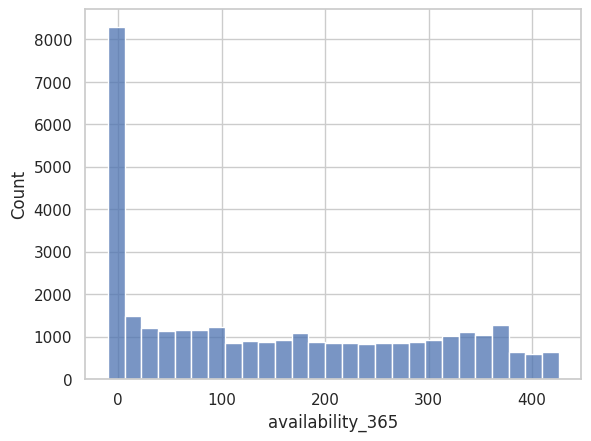

In [148]:
sns.histplot(df_temp['availability_365'])
plt.show()

In [149]:
df_temp['host_name'].value_counts() #we dont have unique names so we cant drop host_id

host_name
Michael    290
David      269
John       197
Sarah      184
Alex       175
          ... 
Mido         1
Minoo        1
Lingzi       1
Noran        1
Ester        1
Name: count, Length: 8671, dtype: int64

In [150]:
df_temp['country_code'] 
df_temp['country_code'].value_counts()  # Dropping the 'country_code' column as it doesn't provide any meaningful insights

country_code
US    33439
Name: count, dtype: int64

In [151]:
df_temp['house_rules'] # Dropping the 'house_rules' column since I am not gonna work with text data

0                                                      NaN
1        Pet friendly but please confirm with me if the...
2        I encourage you to use my kitchen, cooking and...
3                                                      NaN
4        Please no smoking in the house, porch or on th...
                               ...                        
34194    WHEN BOOKING, PLEASE PROVIDE THE FOLLOWING IN ...
34195    No parties. No loud music or noise late at nig...
34196    No Smoking.  No pets except by special arrange...
34197        No pet, No smoking - Quite hours : 9pm - 8am 
34198    No smoking please, no pets to protect our hard...
Name: house_rules, Length: 34199, dtype: object

In [152]:
df_temp['license'] 
df_temp['license'].value_counts()  # We can drop this column 

license
41662/AL    1
Name: count, dtype: int64

In [153]:
df_temp['country'] 
df_temp['country'].value_counts() # We can drop this column too

country
United States    33444
Name: count, dtype: int64

In [154]:
# Drop columns with insufficient data
columns_to_drop = ['country_code',"country",'house_rules','license']
df_temp = df_temp.drop(columns_to_drop, axis=1)

In [155]:
df_temp.columns

Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long',
       'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

# Handling Missing Data


In [156]:
df_temp.isna().sum()

id                                 664
name                               754
host_id                            645
host_identity_verified             862
host_name                          874
neighbourhood_group                704
neighbourhood                      694
lat                                662
long                               675
instant_bookable                   777
cancellation_policy                734
room_type                          726
construction_year                  807
price                              823
service_fee                        771
minimum_nights                     877
number_of_reviews                  716
last_review                       6130
reviews_per_month                 6097
review_rate_number                 781
calculated_host_listings_count     756
availability_365                   834
dtype: int64

### **name**

In [157]:
# For the name column we can scrape data on the google maps to find the data but this is not that big project so I just fill with "Unknown"
df_temp['name']=df_temp['name'].fillna('Unknown')

### **host_id**

In [158]:
df_temp['host_id'] = df_temp['host_id'].fillna(0)

### **host_identity_verified**

In [159]:
df_temp['host_identity_verified'].value_counts()

host_identity_verified
unconfirmed    16746
verified       16591
Name: count, dtype: int64

In [160]:
df_temp['host_identity_verified'] = df_temp['host_identity_verified'].fillna('unconfirmed')

### **host_name**

In [161]:
# Count occurrences of 'host_id'
host_id_counts = df_temp['host_id'].value_counts()

# Filter for 'host_id's that appear more than once
host_ids_multiple_occurrences = host_id_counts[host_id_counts > 1]
# host_ids_multiple_occurrences is null
# Trying to check if there are any 'host_id's with missing 'host_name'. 
# If the 'host_id' is the same, we could potentially fill the missing 'host_name' from the matching rows.
# However, since no matches were found, I will replace the 'null' values of 'host_name' with 'Unknown'.

df_temp['host_name']=df_temp['host_name'].fillna('Unknown')

### **neighbourhood_group**

In [162]:
df_temp['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        14827
Brooklyn         14396
Queens            3414
Bronx              622
Staten Island      234
brookln              1
manhatan             1
Name: count, dtype: int64

In [163]:
# Correcting the spelling of 'neighbourhood group' values in the DataFrame
df_temp.loc[df_temp['neighbourhood_group']=='manhatan', 'neighbourhood_group'] = 'Manhattan'
df_temp.loc[df_temp['neighbourhood_group']=='brookln', 'neighbourhood_group'] = 'Brooklyn'
df_temp['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        14828
Brooklyn         14397
Queens            3414
Bronx              622
Staten Island      234
Name: count, dtype: int64

In [164]:
df_temp['neighbourhood_group'].isna().sum()

704

In [165]:
def get_neighbourhood(lat, long):
    g = geocoder.osm([lat, long], method='reverse')
    if g and g.raw:  # Check if a valid response is received
        #print(g.raw.get('address', {}).get('suburb', ''))
        return g.raw.get('address', {}).get('suburb', '')
    return "Unknown"  # Return a default value if the response is invalid


In [166]:
# Filter rows where 'neighbourhood_group' is null
missing_neighbourhood_idx = df_temp['neighbourhood_group'].isnull()

# Check if 'lat' or 'long' are null only for these rows
missing_lat_long = df_temp.loc[missing_neighbourhood_idx, ['lat', 'long']].isnull().any(axis=1)

# Debug: Print counts of missing lat/long for neighbourhood_group null rows
print(missing_lat_long.value_counts())


False    677
True      27
Name: count, dtype: int64


In [167]:
invalid_rows = missing_neighbourhood_idx & missing_lat_long

if invalid_rows.any():
    invalid_indices = invalid_rows[invalid_rows].index.tolist()
    print(f"Warning: Some rows have both 'neighbourhood_group' and either 'lat' or 'long' missing. (Indices: {invalid_indices})")
    # Optionally, we can drop these rows to get a clean data
    df_temp = df_temp[~invalid_rows]

In [168]:
# For rows where 'neighbourhood_group' is null but 'lat' and 'long' are available, apply the function
df_temp.loc[missing_neighbourhood_idx & ~missing_lat_long, 'neighbourhood_group'] = (
    df_temp.loc[missing_neighbourhood_idx & ~missing_lat_long]
    .apply(lambda x: get_neighbourhood(x.lat, x.long), axis=1)
)

In [169]:
df_temp['neighbourhood_group'].isna().sum()

0

In [170]:
# 'neighbourhood_group' no longer contains any null values, so I will export this DataFrame to a CSV file.
df_temp.to_csv('output.csv', index=False)  

### **neighbourhood & lat & long**

In [171]:
df_temp['neighbourhood'].value_counts()

neighbourhood
Williamsburg          2904
Bedford-Stuyvesant    2520
Harlem                1940
Bushwick              1644
Upper West Side       1476
                      ... 
Woodrow                  1
Huguenot                 1
Richmondtown             1
Oakwood                  1
Willowbrook              1
Name: count, Length: 220, dtype: int64

In [172]:
df_temp['neighbourhood'].isna().sum()

693

In [173]:
df_temp["lat"].describe()

count    33525.000000
mean        40.728878
std          0.054207
min         40.499790
25%         40.689240
50%         40.722340
75%         40.763690
max         40.911690
Name: lat, dtype: float64

In [174]:
df_temp["lat"].isna().sum()

647

In [175]:
df_temp["long"].describe()

count    33511.000000
mean       -73.953816
std          0.043182
min        -74.242850
25%        -73.982520
50%        -73.956280
75%        -73.938895
max        -73.712990
Name: long, dtype: float64

In [176]:
df_temp["long"].isna().sum()

661

In [177]:
# The distance between coordinates is not significantly large,
# I am leaving them as is(It can also be drop). Using a technique similar to what I applied for 'neighbourhood group', 
# these values can easily be filled or adjusted by geocoding or looking up the corresponding neighbourhood based on the coordinates.


### **instant_bookable**

In [178]:
df_temp["instant_bookable"].isna().sum()

777

In [179]:
# We can fill the null values in 'instant_bookable' with either True or False.
# I will choose to fill with True, as it might be more beneficial for the hosts
df_temp['instant_bookable'] = df_temp['instant_bookable'].fillna('True')

### **cancellation_policy**

In [180]:
df_temp["cancellation_policy"].value_counts()

cancellation_policy
moderate    11205
flexible    11146
strict      11087
Name: count, dtype: int64

In [181]:
df_temp["cancellation_policy"].isna().sum()

734

In [182]:
# We can fill the null values in 'instant_bookable' with either 'moderate ', 'flexible' and 'strict'.
# I will choose to fill with True, as it might be more beneficial for the hosts and guests.
df_temp["cancellation_policy"].fillna('moderate')

0          strict
1        moderate
2        flexible
3        moderate
4        moderate
           ...   
34194    flexible
34195    flexible
34196    moderate
34197    moderate
34198    moderate
Name: cancellation_policy, Length: 34172, dtype: object

### **room_type**

In [183]:
df_temp["room_type"].value_counts()

room_type
Entire home/apt    17624
Private room       15191
Shared room          631
Name: count, dtype: int64

In [184]:
df_temp["room_type"].isna().sum()
df_temp["room_type"].fillna('Unknown')

0           Private room
1        Entire home/apt
2           Private room
3        Entire home/apt
4        Entire home/apt
              ...       
34194    Entire home/apt
34195    Entire home/apt
34196       Private room
34197       Private room
34198       Private room
Name: room_type, Length: 34172, dtype: object

### **construction_year**

In [186]:
df_temp["construction_year"].value_counts()

construction_year
2008.0    1721
2019.0    1710
2014.0    1697
2010.0    1686
2012.0    1684
2005.0    1679
2022.0    1679
2017.0    1675
2006.0    1671
2021.0    1665
2015.0    1663
2007.0    1658
2009.0    1657
2004.0    1656
2018.0    1654
2003.0    1653
2020.0    1650
2011.0    1644
2013.0    1644
2016.0    1619
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


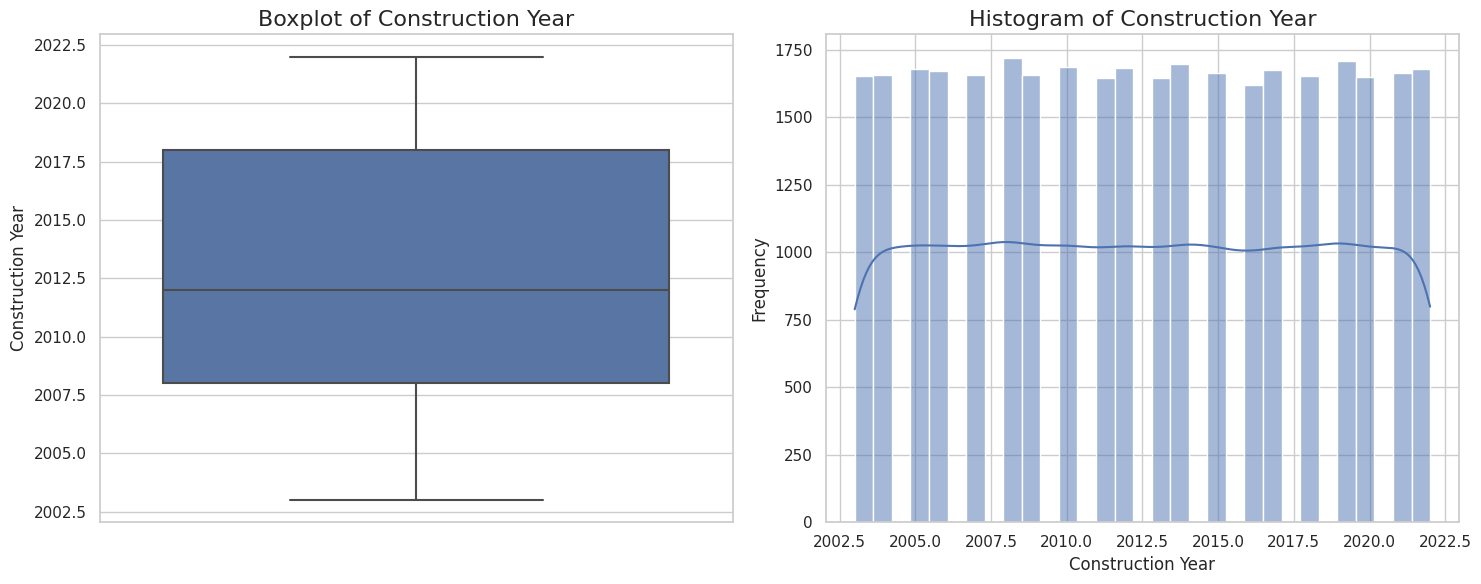

In [187]:
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # 1 row, 2 columns

# Boxplot
sns.boxplot(y=df_temp['construction_year'], ax=axes[0])
axes[0].set_title("Boxplot of Construction Year", fontsize=16)
axes[0].set_ylabel("Construction Year", fontsize=12)

# Histogram with KDE
sns.histplot(df_temp['construction_year'], kde=True, ax=axes[1])
axes[1].set_title("Histogram of Construction Year", fontsize=16)
axes[1].set_xlabel("Construction Year", fontsize=12)
axes[1].set_ylabel("Frequency", fontsize=12)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [188]:
# Data looks balanced and their is no outline value so I can fill the null values with median values
median_value = df_temp["construction_year"].median()
df_temp["construction_year"].fillna(median_value, inplace=True)

/tmp/ipykernel_30/3365210524.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_temp["construction_year"].fillna(median_value, inplace=True)


In [189]:
df_temp['construction_year'] = df_temp['construction_year'].astype(int)

In [190]:
df_temp['construction_year'].isna().sum()

0

### **price & service_fee**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


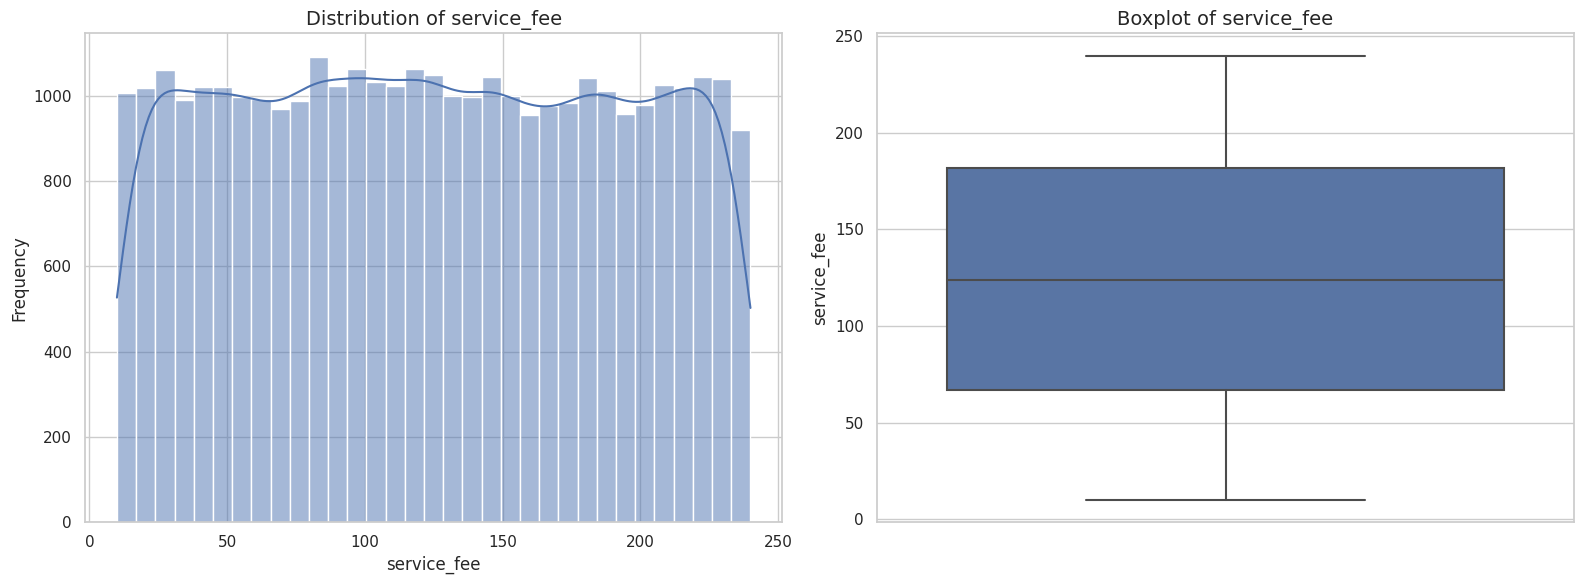

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


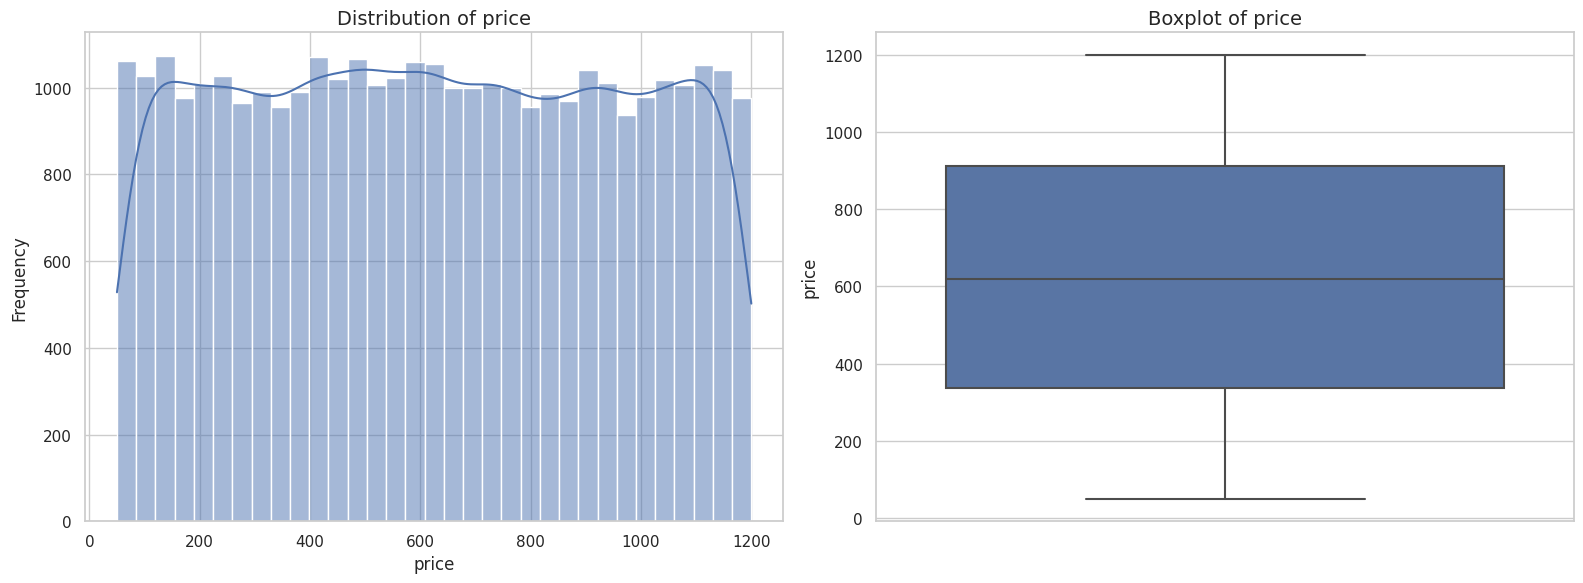

In [191]:
# List of selected columns to plot
selected_cols = ['service_fee', 'price']

# Plot each column separately with histogram and boxplot
for col in selected_cols:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Create two plots side by side

    # Histogram with KDE
    sns.histplot(df_temp[col], kde=True, ax=axes[0])
    axes[0].set_title(f'Distribution of {col}', fontsize=14)
    axes[0].set_xlabel(col, fontsize=12)
    axes[0].set_ylabel('Frequency', fontsize=12)

    # Boxplot
    sns.boxplot(y=df_temp[col], ax=axes[1])
    axes[1].set_title(f'Boxplot of {col}', fontsize=14)
    axes[1].set_ylabel(col, fontsize=12)

    # Show the plots
    plt.tight_layout()
    plt.show()


In [192]:
# Fill the columns with median (balanced data)
df_temp['price'] = df_temp['price'].fillna(df_temp['price'].median())
df_temp['service_fee'] = df_temp['service_fee'].fillna(df_temp['service_fee'].median())


In [193]:
df_temp["host_id"] = df_temp["host_id"].fillna(0)


In [194]:
df_temp.isna().sum()

id                                 664
name                                 0
host_id                              0
host_identity_verified               0
host_name                            0
neighbourhood_group                  0
neighbourhood                      693
lat                                647
long                               661
instant_bookable                     0
cancellation_policy                734
room_type                          726
construction_year                    0
price                                0
service_fee                          0
minimum_nights                     874
number_of_reviews                  715
last_review                       6125
reviews_per_month                 6091
review_rate_number                 781
calculated_host_listings_count     756
availability_365                   833
dtype: int64

In [195]:
df_temp.isna().sum()

id                                 664
name                                 0
host_id                              0
host_identity_verified               0
host_name                            0
neighbourhood_group                  0
neighbourhood                      693
lat                                647
long                               661
instant_bookable                     0
cancellation_policy                734
room_type                          726
construction_year                    0
price                                0
service_fee                          0
minimum_nights                     874
number_of_reviews                  715
last_review                       6125
reviews_per_month                 6091
review_rate_number                 781
calculated_host_listings_count     756
availability_365                   833
dtype: int64

In [ ]:
df_temp.isna().sum()